<a href="https://colab.research.google.com/github/Abhishek2104200/QML/blob/main/quantum_trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import time

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Create large random matrices
size = 10000
a = torch.randn(size, size, device=device)
b = torch.randn(size, size, device=device)

# Benchmark
start = time.time()
c = torch.matmul(a, b)
end = time.time()

print(f"Matrix multiplication took {end - start:.2f} seconds on {device}")


Using device: cpu
Matrix multiplication took 31.57 seconds on cpu


In [ ]:
import torch
import time

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Create large random matrices
size = 10000
a = torch.randn(size, size, device=device)
b = torch.randn(size, size, device=device)

# Benchmark
start = time.time()
c = torch.matmul(a, b)
end = time.time()

print(f"Matrix multiplication took {end - start:.2f} seconds on {device}")


Using device: cuda
Matrix multiplication took 0.20 seconds on cuda


In [ ]:
# Install QML libraries
!pip install pennylane qiskit torch torchvision



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 132.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For data handling
import pandas as pd
import numpy as np
import os

# For ML and QML
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Assuming your file is named 'sars_data.csv'
df = pd.read_csv("/content/drive/MyDrive/final_balanced_with_sequence.csv")

# Quick check
df.head()
df.shape


(50000, 31)

In [ ]:
df.head()

,Accession,Organism_Name,GenBank_RefSeq,Submitters,Organization,Org_location,Release_Date,Pangolin,PangoVersions,Surveillance_Sampling,...,USA,Host,Tissue_Specimen_Source,Collection_Date,BioSample,BioProject,GenBank_Title,Variant_Group,WHO_Variant,Sequence
0,OX474929.1,Severe acute respiratory syndrome coronavirus 2,GenBank,NaN,"Northumbria University, Newcastle upon Tyne, N...",NaN,2023-04-29,B,4.3.1/1.31/v0.1.12/0.3.19/0.6.2,NaN,...,NaN,Homo sapiens,NaN,2020-03-17,SAMEA7079119,PRJEB37886,Severe acute respiratory syndrome coronavirus ...,B,Alpha,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1,MZ185301.1,Severe acute respiratory syndrome coronavirus 2,GenBank,"Howard,D., Batra,D., Cook,P.W., Moser,K., Pask...","Centers for Disease Control and Prevention, Re...",USA,2021-05-13,B.1.526,4.3.1/1.31/v0.1.12/0.3.19/0.6.2,True,...,ME,Homo sapiens,oronasopharynx,2021-04-29,SAMN22689283,PRJNA731148,Severe acute respiratory syndrome coronavirus ...,B,Alpha,ACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAA...
2,OU389953.1,Severe acute respiratory syndrome coronavirus 2,GenBank,NaN,London,United Kingdom,2021-07-13,B.1.1.7,4.3.1/1.31/v0.1.12/0.3.19/0.6.2,NaN,...,NaN,Homo sapiens,NaN,2021-01-11,SAMEA8368730,PRJEB37886,Severe acute respiratory syndrome coronavirus ...,B,Alpha,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
3,OX597302.1,Severe acute respiratory syndrome coronavirus 2,GenBank,NaN,"Public Health Wales Microbiology Cardiff, Univ...",NaN,2023-05-13,B.1.177.15,4.3.1/1.31/v0.1.12/0.3.19/0.6.2,NaN,...,NaN,Homo sapiens,NaN,2020-12-01,SAMEA7813988,PRJEB37886,Severe acute respiratory syndrome coronavirus ...,B,Alpha,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNACTTTCGA...
4,PP603966.1,Severe acute respiratory syndrome coronavirus 2,GenBank,"Amin,H., Wang,J., Su,M., Akther,S., Bologna,J....","NYC DOHMH, Bureau of the Public Health Laboratory",USA,2024-04-09,B.1.1.434,4.3.1/1.31/v0.1.12/0.3.19/0.6.2,NaN,...,NaN,Homo sapiens,NaN,2021-02-10,SAMN20961554,PRJNA704697,Severe acute respiratory syndrome coronavirus ...,B,Alpha,AACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAAT...


In [ ]:
# Confirm no missing or empty sequences
print("Missing sequences:", df['Sequence'].isna().sum())
print("Empty sequences:", (df['Sequence'].str.strip() == '').sum())


Missing sequences: 21
Empty sequences: 0


In [ ]:
# Remove rows where 'sequence' is NaN or empty string
df = df[df['Sequence'].notna()]             # Remove NaNs
df = df[df['Sequence'].str.strip() != '']   # Remove empty strings

# Check shape after cleaning
print("Cleaned dataset shape:", df.shape)


Cleaned dataset shape: (49979, 31)


In [ ]:
# Show all column names
print(df.columns)


Index(['Accession', 'Organism_Name', 'GenBank_RefSeq', 'Submitters',
       'Organization', 'Org_location', 'Release_Date', 'Pangolin',
       'PangoVersions', 'Surveillance_Sampling', 'Isolate', 'Species', 'Genus',
       'Family', 'Molecule_type', 'Length', 'Nuc_Completeness', 'Genotype',
       'Segment', 'Geo_Location', 'Country', 'USA', 'Host',
       'Tissue_Specimen_Source', 'Collection_Date', 'BioSample', 'BioProject',
       'GenBank_Title', 'Variant_Group', 'WHO_Variant', 'Sequence'],
      dtype='object')


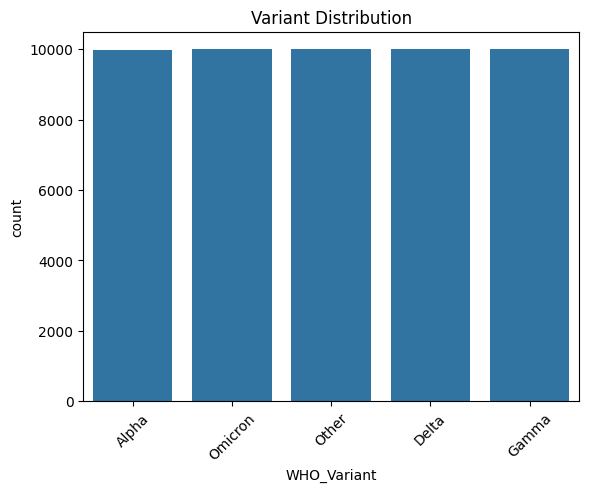

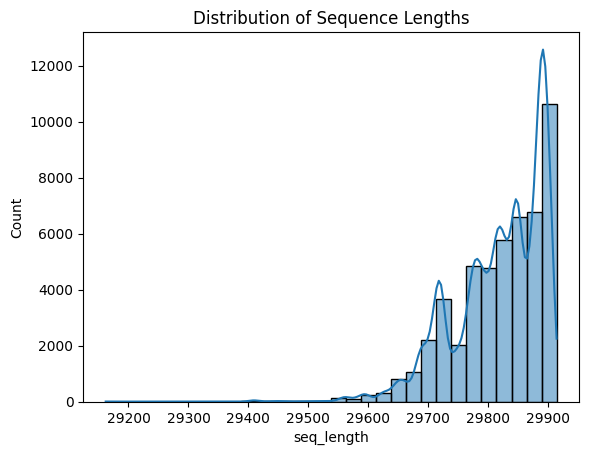

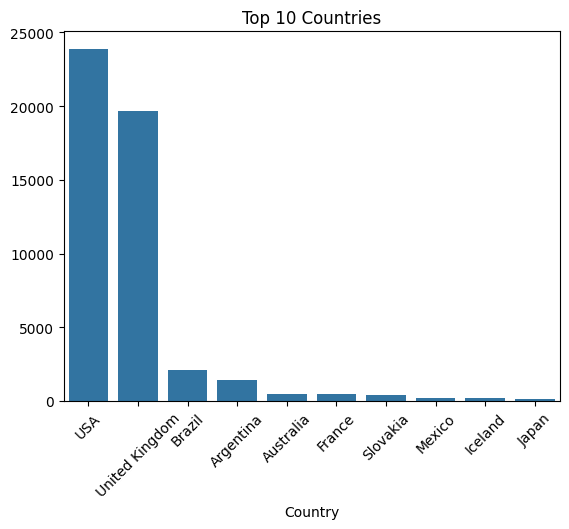

In [ ]:
# Variant label counts
sns.countplot(data=df, x='WHO_Variant')
plt.title("Variant Distribution")
plt.xticks(rotation=45)
plt.show()

# Sequence lengths
df['seq_length'] = df['Sequence'].str.len()
sns.histplot(df['seq_length'], bins=30, kde=True)
plt.title("Distribution of Sequence Lengths")
plt.show()

# Country distribution (top 10)
top_countries = df['Country'].value_counts().nlargest(10)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title("Top 10 Countries")
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['WHO_Variant'])

# Optional: check mapping of labels to integers
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)


Label Mapping: {'Alpha': np.int64(0), 'Delta': np.int64(1), 'Gamma': np.int64(2), 'Omicron': np.int64(3), 'Other': np.int64(4)}


In [ ]:
!pip install tqdm


In [ ]:
import pandas as pd
from collections import Counter
from itertools import product
from tqdm import tqdm

# All possible 3-mers
def get_kmers(k=3):
    return [''.join(p) for p in product('ACGT', repeat=k)]

# Encode a single sequence
def kmer_encode_sequence(sequence, k=3):
    kmers = [sequence[i:i+k] for i in range(len(sequence) - k + 1)]
    kmer_counts = Counter(kmers)
    all_kmers = get_kmers(k)
    return [kmer_counts.get(kmer, 0) for kmer in all_kmers]


In [ ]:
import pandas as pd
from collections import Counter
from itertools import product
from tqdm import tqdm

# All possible 3-mers
def get_kmers(k=3):
    return [''.join(p) for p in product('ACGT', repeat=k)]

# Encode a single sequence
def kmer_encode_sequence(sequence, k=3):
    kmers = [sequence[i:i+k] for i in range(len(sequence) - k + 1)]
    kmer_counts = Counter(kmers)
    all_kmers = get_kmers(k)
    return [kmer_counts.get(kmer, 0) for kmer in all_kmers]


In [ ]:
import pandas as pd
from collections import Counter
from itertools import product
from tqdm import tqdm

# All possible 3-mers
def get_kmers(k=3):
    return [''.join(p) for p in product('ACGT', repeat=k)]

# Encode a single sequence
def kmer_encode_sequence(sequence, k=3):
    kmers = [sequence[i:i+k] for i in range(len(sequence) - k + 1)]
    kmer_counts = Counter(kmers)
    all_kmers = get_kmers(k)
    return [kmer_counts.get(kmer, 0) for kmer in all_kmers]

# Parameters
k = 3
tqdm.pandas()

# Apply encoding
df_kmers = df['Sequence'].progress_apply(lambda x: kmer_encode_sequence(x, k))
df_kmers = pd.DataFrame(df_kmers.tolist(), columns=[f'kmer_{kmer}' for kmer in get_kmers(k)])

# Optional: Normalize k-mer frequencies
df_kmers = df_kmers.div(df_kmers.sum(axis=1), axis=0)

# ✅ Add back to original DataFrame (WITHOUT dropping 'Sequence')
df_final = pd.concat([df.reset_index(drop=True), df_kmers.reset_index(drop=True)], axis=1)

# 🔽 Save to CSV (including sequences + k-mer features)
df_final.to_csv("sars_cov2_kmer_encoded.csv", index=False)


100%|██████████| 49979/49979 [05:14<00:00, 158.92it/s]


In [ ]:
df_final.columns

Index(['Accession', 'Organism_Name', 'GenBank_RefSeq', 'Submitters',
       'Organization', 'Org_location', 'Release_Date', 'Pangolin',
       'PangoVersions', 'Surveillance_Sampling', 'Isolate', 'Species', 'Genus',
       'Family', 'Molecule_type', 'Length', 'Nuc_Completeness', 'Genotype',
       'Segment', 'Geo_Location', 'Country', 'USA', 'Host',
       'Tissue_Specimen_Source', 'Collection_Date', 'BioSample', 'BioProject',
       'GenBank_Title', 'Variant_Group', 'WHO_Variant', 'Sequence',
       'seq_length', 'target', 'kmer_AAA', 'kmer_AAC', 'kmer_AAG', 'kmer_AAT',
       'kmer_ACA', 'kmer_ACC', 'kmer_ACG', 'kmer_ACT', 'kmer_AGA', 'kmer_AGC',
       'kmer_AGG', 'kmer_AGT', 'kmer_ATA', 'kmer_ATC', 'kmer_ATG', 'kmer_ATT',
       'kmer_CAA', 'kmer_CAC', 'kmer_CAG', 'kmer_CAT', 'kmer_CCA', 'kmer_CCC',
       'kmer_CCG', 'kmer_CCT', 'kmer_CGA', 'kmer_CGC', 'kmer_CGG', 'kmer_CGT',
       'kmer_CTA', 'kmer_CTC', 'kmer_CTG', 'kmer_CTT', 'kmer_GAA', 'kmer_GAC',
       'kmer_GAG', 'kmer_GA

In [ ]:
# Define path in your Drive
output_path = "/content/drive/MyDrive/sars_cov2_kmer_encoded.csv"

# Save CSV to that path
df_final.to_csv(output_path, index=False)


In [ ]:
from sklearn.model_selection import train_test_split

# Features = only k-mer columns
kmer_cols = [col for col in df_final.columns if col.startswith('kmer_')]
X = df_final[kmer_cols]
y = df_final['target']

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# **BenchMark**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1997
           1       0.96      0.98      0.97      2000
           2       1.00      0.99      0.99      2000
           3       0.93      0.95      0.94      2000
           4       0.95      0.91      0.93      1999

    accuracy                           0.95      9996
   macro avg       0.95      0.95      0.95      9996
weighted avg       0.95      0.95      0.95      9996

[[1851   72    2   59   13]
 [  25 1969    0    3    3]
 [  15    2 1983    0    0]
 [   9    3    0 1899   89]
 [  89    2    3   89 1816]]
